In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

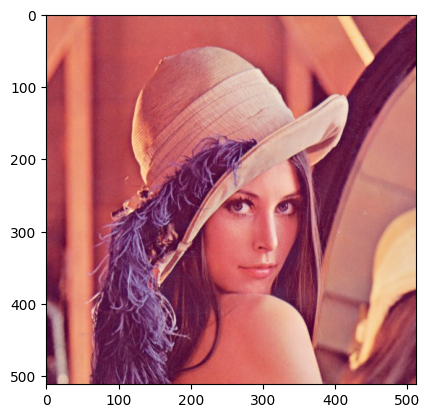

In [13]:
img = cv2.imread('image.png') [:,:,::-1]
plt.imshow(img)

Text(0, 0.5, 'count')

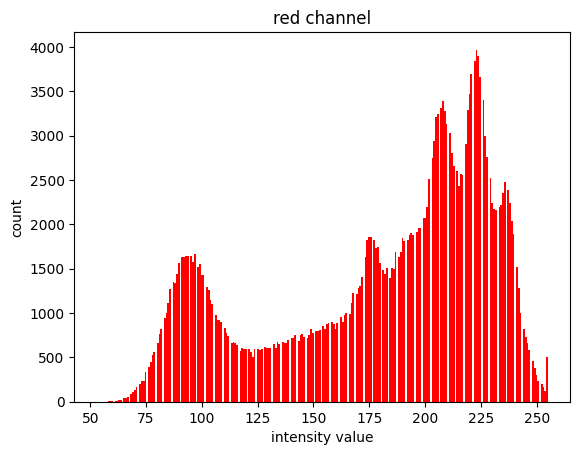

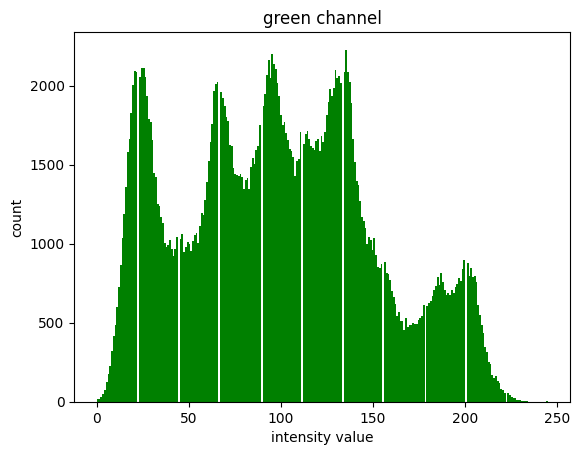

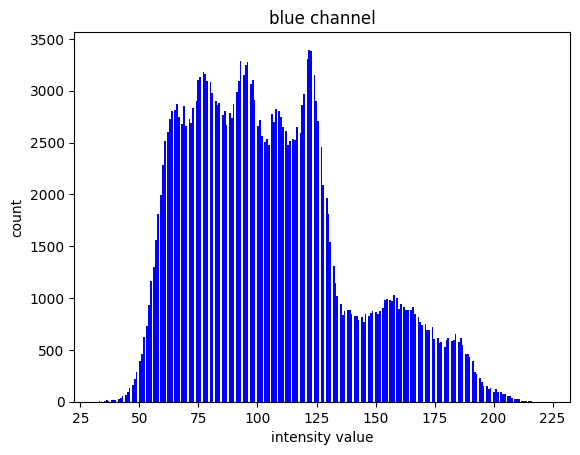

In [15]:
# plotting histogram from each channel
# a.ravel() flattens image, it does not store original array

plt.figure()
ax = plt.hist(img[:,:,0].ravel(), bins=256, color='r')
plt.title('red channel')
plt.xlabel('intensity value')
plt.ylabel('count')

plt.figure()
ax = plt.hist(img[:,:,1].ravel(), bins=256, color='g')
plt.title('green channel')
plt.xlabel('intensity value')
plt.ylabel('count')

plt.figure()
ax = plt.hist(img[:,:,2].ravel(), bins=256, color='b')
plt.title('blue channel')
plt.xlabel('intensity value')
plt.ylabel('count')

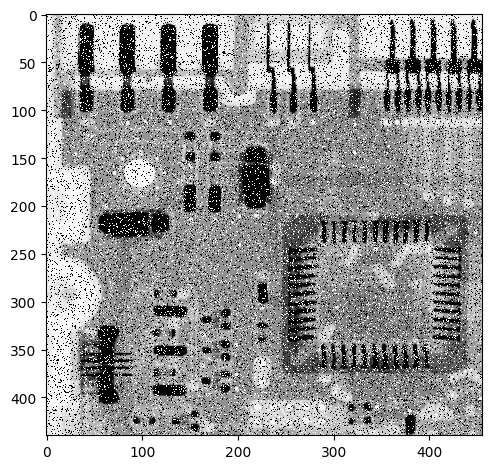

In [66]:
image = io.imread('sample.tif')

io.imshow(image)

In [67]:
h, w = image.shape
tot_pix = h*w

hist = np.zeros(256, dtype=int)

for i in range(h):
  for j in range(w):
    pix_val = image[i,j]
    hist[pix_val] += 1

print(hist)

[30628  1254  1028   809   591   463   367   298   254   210   185   139
   126    97    89    69    75    70    58    44    44    52    40    48
    61    44    49    60    37    42    34    47    41    41    52    51
    39    60    63    64    57    59    58    54    58    49    58    59
    68    62    87    74    79    72   103    98   114   137   112   128
   141   165   148   148   156   145   170   170   179   192   181   179
   192   208   225   178   191   205   211   213   203   195   208   199
   181   166   191   215   141   154   158   153   151   154   172   169
   155   151   156   174   186   141   155   162   174   167   151   158
   165   200   188   207   196   212   243   240   276   306   302   351
   403   396   414   529   602   599   677   758   764   950   924  1037
   972  1070  1056  1230  1307  1586  2016  2311  2546  2662  2819  3246
  3427  3286  3037  2792  2649  2656  2623  2360  2207  1821  1539  1355
  1148  1081  1048  1110  1159  1140  1251  1232  1

In [68]:
cdf = hist.cumsum()
print(cdf)

[ 30628  31882  32910  33719  34310  34773  35140  35438  35692  35902
  36087  36226  36352  36449  36538  36607  36682  36752  36810  36854
  36898  36950  36990  37038  37099  37143  37192  37252  37289  37331
  37365  37412  37453  37494  37546  37597  37636  37696  37759  37823
  37880  37939  37997  38051  38109  38158  38216  38275  38343  38405
  38492  38566  38645  38717  38820  38918  39032  39169  39281  39409
  39550  39715  39863  40011  40167  40312  40482  40652  40831  41023
  41204  41383  41575  41783  42008  42186  42377  42582  42793  43006
  43209  43404  43612  43811  43992  44158  44349  44564  44705  44859
  45017  45170  45321  45475  45647  45816  45971  46122  46278  46452
  46638  46779  46934  47096  47270  47437  47588  47746  47911  48111
  48299  48506  48702  48914  49157  49397  49673  49979  50281  50632
  51035  51431  51845  52374  52976  53575  54252  55010  55774  56724
  57648  58685  59657  60727  61783  63013  64320  65906  67922  70233
  7277

In [69]:
normalized_cdf = cdf/tot_pix
print(normalized_cdf)

[0.15298701 0.15925075 0.16438561 0.16842657 0.17137862 0.17369131
 0.17552448 0.17701299 0.17828172 0.17933067 0.18025475 0.18094905
 0.18157842 0.18206294 0.18250749 0.18285215 0.18322677 0.18357642
 0.18386613 0.18408591 0.18430569 0.18456543 0.18476523 0.185005
 0.18530969 0.18552947 0.18577423 0.18607393 0.18625874 0.18646853
 0.18663836 0.18687313 0.18707792 0.18728272 0.18754246 0.1877972
 0.18799201 0.18829171 0.18860639 0.18892607 0.18921079 0.18950549
 0.1897952  0.19006494 0.19035465 0.1905994  0.19088911 0.19118382
 0.19152348 0.19183317 0.19226773 0.19263736 0.19303197 0.19339161
 0.19390609 0.1943956  0.19496503 0.19564935 0.19620879 0.19684815
 0.19755245 0.19837662 0.19911588 0.19985514 0.20063437 0.20135864
 0.20220779 0.20305694 0.20395105 0.20491009 0.20581419 0.20670829
 0.20766733 0.20870629 0.20983017 0.21071928 0.21167333 0.2126973
 0.21375125 0.21481518 0.21582917 0.2168032  0.21784216 0.21883616
 0.21974026 0.22056943 0.22152348 0.2225974  0.2233017  0.22407093

In [72]:
flattened_img = image.flatten()
equalized_intensities = np.zeros_like(flattened_img)

for i in range(len(flattened_img)):
  pix_intensity = flattened_img[i]
  equalized_intensities[i] = normalized_cdf[pix_intensity] * 255

equalized_img = equalized_intensities.reshape(image.shape).astype(np.uint8)

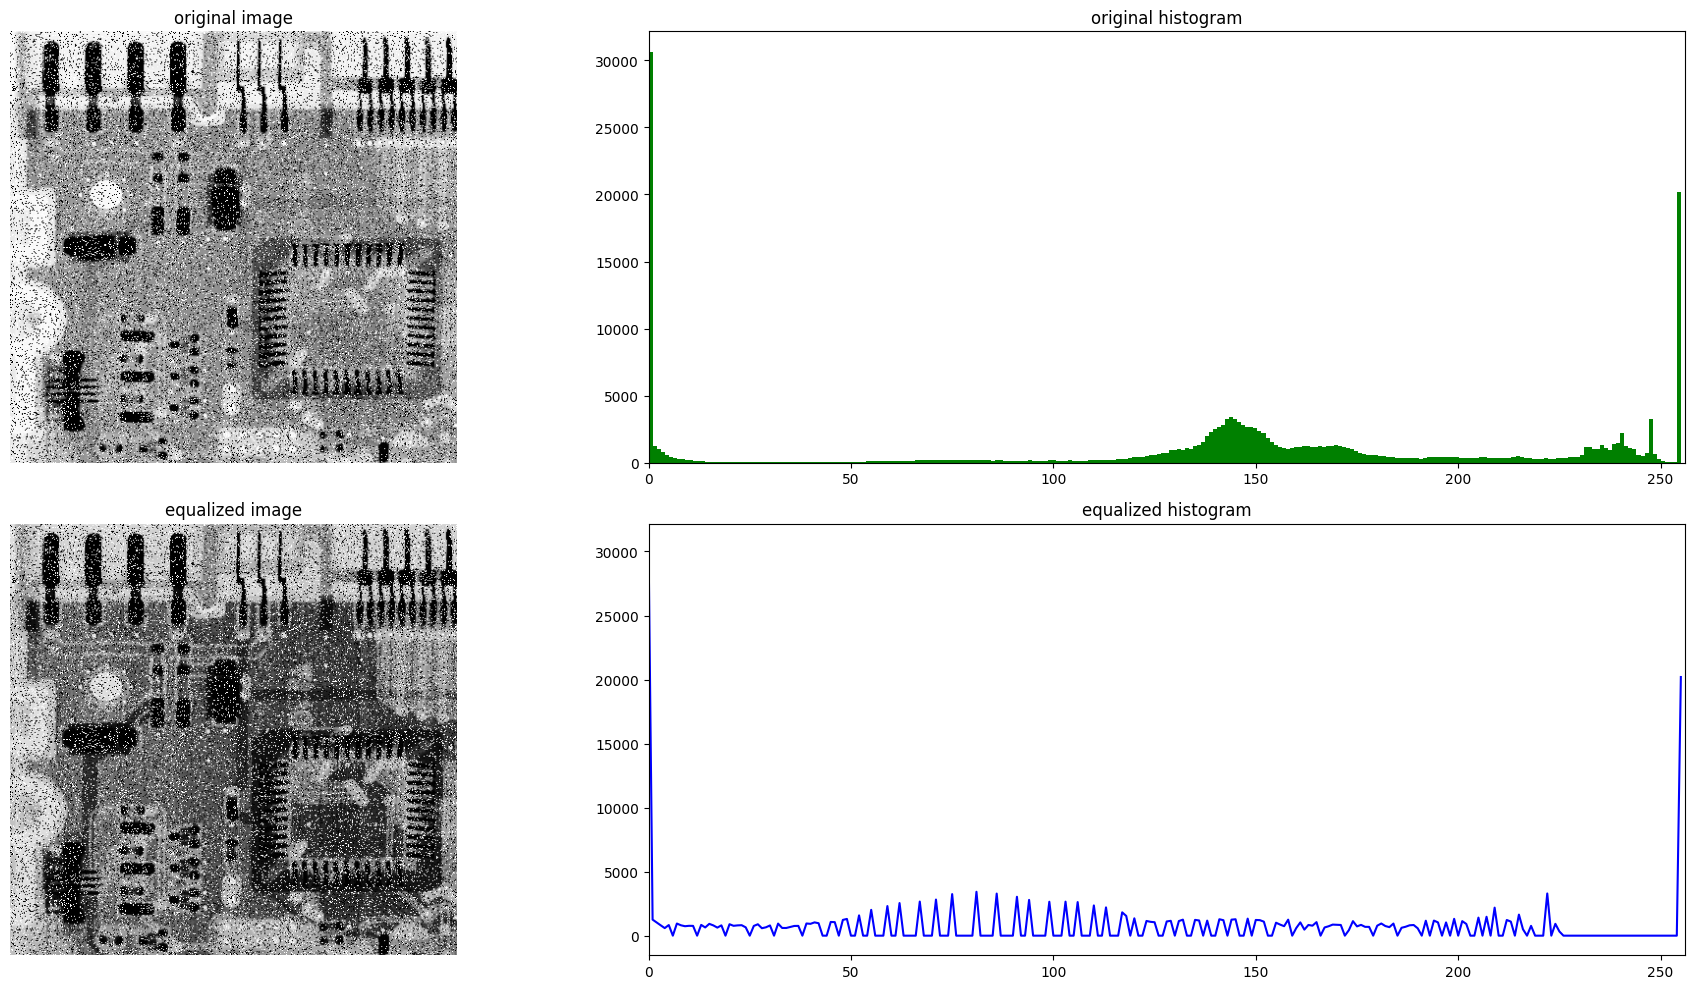

In [81]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.title("original image")
plt.axis("off")
plt.imshow(image, cmap="gray")

plt.subplot(2,2,2)
plt.hist(image.flatten(), 256, color="g")
plt.xlim([0, 256])
plt.title("original histogram")

plt.subplot(2,2,3)
plt.title("equalized image")
plt.axis("off")
plt.imshow(equalized_img, cmap="gray")

plt.subplot(2,2,4)
hist_eq, bins_eq = np.histogram(equalized_img.flatten(), 256)
plt.plot(hist_eq, color="b")
plt.xlim([0, 256])
plt.title("equalized histogram")

plt.tight_layout()
plt.show()